In [1]:
"""
Name: Wenying Wang

Section: Part 2
"""

'\nName: Wenying Wang\n\nSection: Part 2\n'

In [2]:
# install the yfinance library through typing and executing "pip install yfinance" in the Command Line Interface.
import yfinance as yf
import pandas as pd

# create a list to label data
data_name=['JPM','SPY','DIA']
# settle the range of time
start_date='2019-12-30'
end_date='2023-12-30'
# use yfinance to download all data of stock and index 
data=yf.download(data_name,start=start_date,end=end_date)
# selecte the open,high,low,close,volume of JPMorgan Chase and the close of S&P 500 and Dow Jones Index
SDPA_data=pd.DataFrame()
SDPA_data['JPM_Open']=data['Open']['JPM']
SDPA_data['JPM_High']=data['High']['JPM']
SDPA_data['JPM_Low']=data['Low']['JPM']
SDPA_data['JPM_Close']=data['Close']['JPM']
SDPA_data['JPM_Volume']=data['Volume']['JPM']
SDPA_data['SPY_Close']=data['Close']['SPY']
SDPA_data['DIA_Close']=data['Close']['DIA']
# save the csv file 
SDPA_data.to_csv('/Users/guzhemeimao/Downloads/SDPA_data.csv')


[*********************100%%**********************]  3 of 3 completed


In [3]:
# load the dataset
SDPA_raw_df=pd.read_csv('/Users/guzhemeimao/Downloads/SDPA_data.csv')
SDPA_raw_df

,Date,JPM_Open,JPM_High,JPM_Low,JPM_Close,JPM_Volume,SPY_Close,DIA_Close
0,2019-12-30,139.899994,140.080002,138.470001,138.630005,6963000,321.079987,284.529999
1,2019-12-31,138.509995,139.479996,138.289993,139.399994,7201600,321.859985,285.100006
2,2020-01-02,139.789993,141.100006,139.259995,141.089996,10803700,324.869995,288.619995
3,2020-01-03,137.500000,139.229996,137.080002,138.339996,10386800,322.410004,286.320007
4,2020-01-06,136.559998,138.270004,136.500000,138.229996,10259000,323.640015,286.980011
...,...,...,...,...,...,...,...,...
1003,2023-12-22,167.500000,168.229996,167.229996,167.399994,6574900,473.649994,373.799988
1004,2023-12-26,167.460007,168.770004,167.179993,168.389999,4683600,475.649994,375.350006
1005,2023-12-27,167.839996,169.470001,167.580002,169.399994,6428600,476.510010,376.559998
1006,2023-12-28,169.350006,170.660004,169.000000,170.300003,6320100,476.690002,377.029999


We have 8 columns and 1008 rows data, the zero row is the name of data, they are 'Date','JPM_Open', 'JPM_High', 'JPM_Low', 'JPM_Close', 'JPM_Volume', 'SPY_Close' and 'DIA_Close'. From the second to the sixth columns of data are all related to JPMorgan Chase's stock. The seventh column called 'SPY_Close' means the close price of S&P 500, and the last column called 'DIA_Close' means the close price of Dow Jones Index. 

In [4]:
# check for missing values
print(SDPA_raw_df.isnull().sum())

Date          0
JPM_Open      0
JPM_High      0
JPM_Low       0
JPM_Close     0
JPM_Volume    0
SPY_Close     0
DIA_Close     0
dtype: int64


The result shows that there is no missing data.
Since the data is crawled from a reliable website, and the data is about stock and index, so we can assume that there are no outliers. 

In [5]:
SDPA_raw_df.describe()

,JPM_Open,JPM_High,JPM_Low,JPM_Close,JPM_Volume,SPY_Close,DIA_Close
count,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03,1008.000000,1008.000000
mean,133.546349,134.950010,132.132203,133.546319,1.413790e+07,395.652064,319.873333
std,22.318667,22.222063,22.444470,22.355110,7.333324e+06,52.276650,35.044479
min,81.559998,83.750000,76.910004,79.029999,3.220500e+06,222.949997,186.130005
25%,116.737499,118.447498,115.035000,116.387499,9.341925e+06,366.775009,300.067505
50%,137.225006,138.279999,135.964996,137.430000,1.224810e+07,407.000000,332.255005
75%,152.122498,153.672497,150.689999,152.147499,1.615750e+07,437.064995,344.687508
max,172.710007,172.960007,170.539993,171.779999,5.441880e+07,477.709991,377.029999


In [6]:
df=SDPA_raw_df.iloc[:, 1:]
SDPA_range=df.max()-df.min()
print(SDPA_range)

JPM_Open      9.115001e+01
JPM_High      8.921001e+01
JPM_Low       9.362999e+01
JPM_Close     9.275000e+01
JPM_Volume    5.119830e+07
SPY_Close     2.547600e+02
DIA_Close     1.909000e+02
dtype: float64


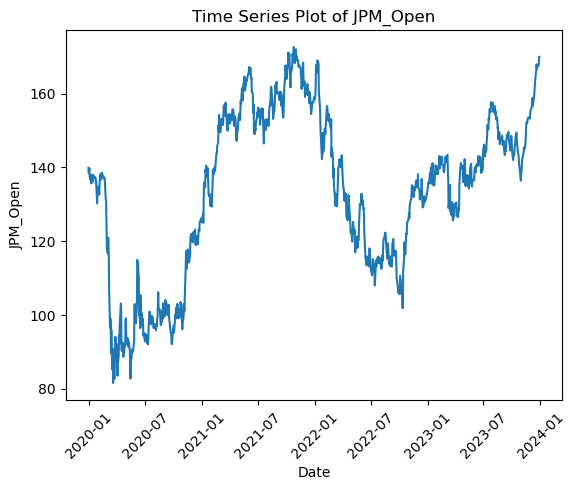

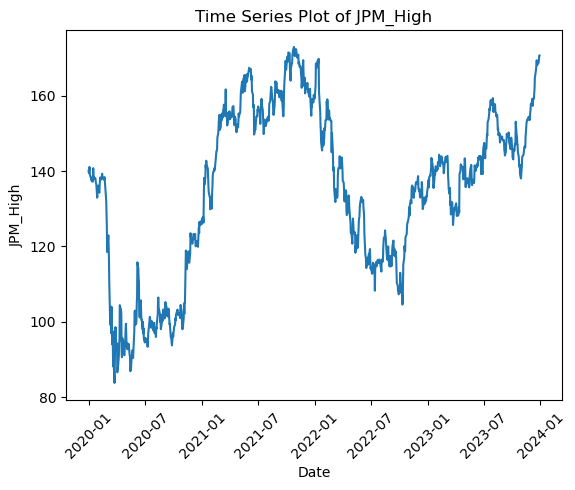

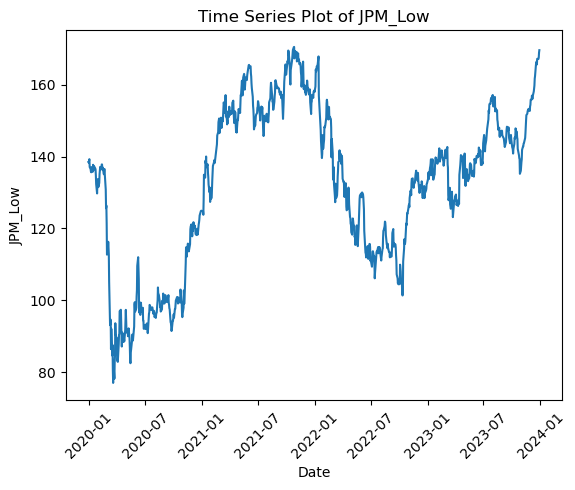

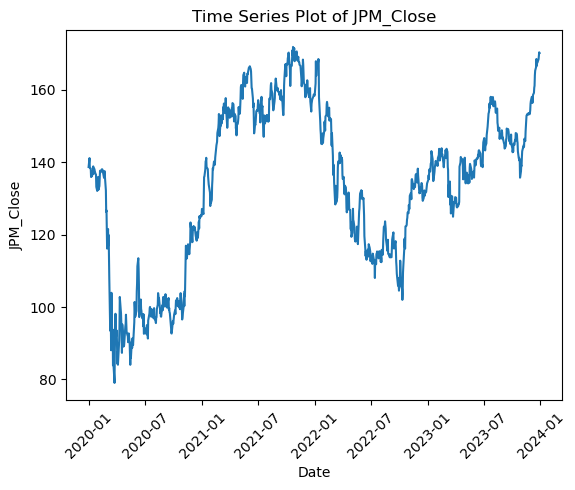

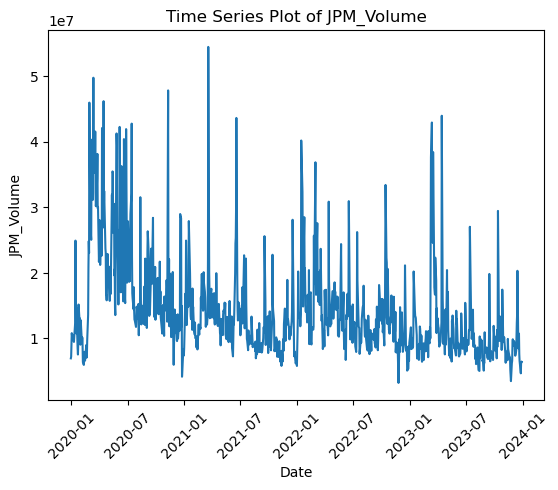

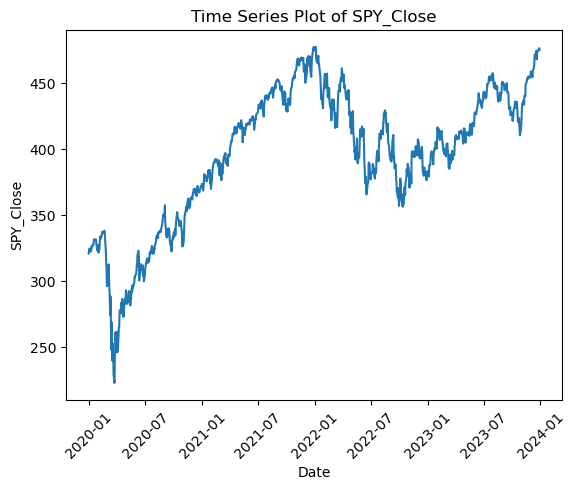

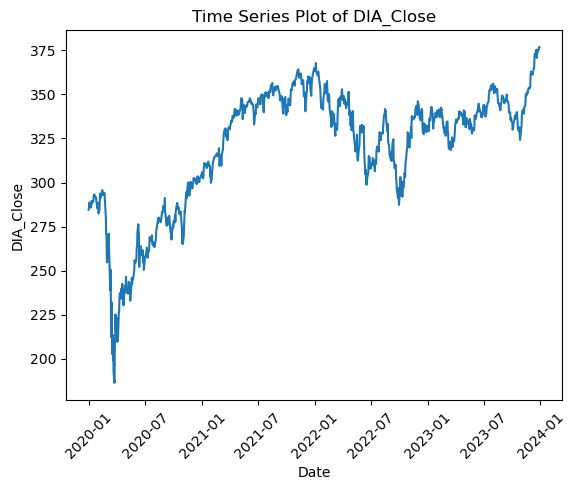

In [7]:
import matplotlib.pyplot as plt
SDPA_raw_df=pd.read_csv('/Users/guzhemeimao/Downloads/SDPA_data.csv')
SDPA_raw_df['Date']=pd.to_datetime(SDPA_raw_df['Date'])
SDPA_raw_df.set_index('Date', inplace=True) # set the first column called 'Date' as index to draw plots
for column in SDPA_raw_df.columns:
    plt.plot(SDPA_raw_df.index, SDPA_raw_df[column],linestyle='-')  
    plt.title(f'Time Series Plot of {column}')  # set the titles
    plt.xlabel('Date')  # set label of X axis 
    plt.ylabel(column)  # set label of Y axis
    plt.xticks(rotation=45) 
    plt.show()




Exploring correlation between data:
I want to draw a line chart containing the close prices of JPMorgan Chase, S&P 500 Index and Dow Jones Index. 

Firstly, we generate a plot using the raw prices of data.

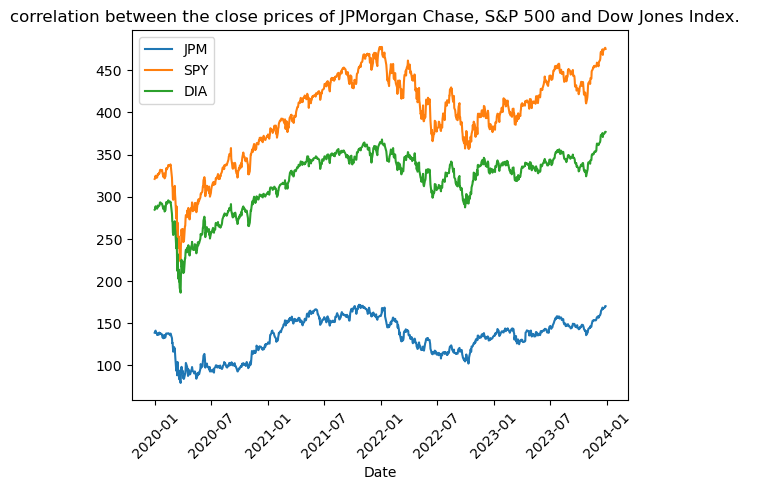

In [8]:
plt.plot(SDPA_raw_df.index, SDPA_raw_df['JPM_Close'],linestyle='-',label='JPM')  
plt.plot(SDPA_raw_df.index, SDPA_raw_df['SPY_Close'],linestyle='-',label='SPY')  
plt.plot(SDPA_raw_df.index, SDPA_raw_df['DIA_Close'],linestyle='-',label='DIA') 
plt.title(f'correlation between the close prices of JPMorgan Chase, S&P 500 and Dow Jones Index.  ')  # set the titles
plt.xlabel('Date')  # set label of X axis 
plt.legend()
plt.xticks(rotation=45) 
plt.show()

Frome the figure above, we can find that they are likely positively correlated, which means they have similar trend.The blue line representing JPM remains a lower value compared to the others, indicating that the close price of JPMorgan Chase is lower than market index.
The orange line representing S&P 500 Index has a higer value than the green line representing Dow Jones Index during the data time. But it is not a very meaningful comparison as we generally use yields of prices to analyse which are standardised and fair to compare different kinds of assets. 

In [9]:
# generate data of daily return and named the new dataframe as 'SDPA_df'
SDPA_df=pd.DataFrame(SDPA_raw_df)
SDPA_df['JPM_D_Return']=SDPA_df['JPM_Close'].pct_change()
SDPA_df['SPY_D_Return']=SDPA_df['SPY_Close'].pct_change()
SDPA_df['DIA_D_Return']=SDPA_df['DIA_Close'].pct_change()
SDPA_df

,JPM_Open,JPM_High,JPM_Low,JPM_Close,JPM_Volume,SPY_Close,DIA_Close,JPM_D_Return,SPY_D_Return,DIA_D_Return
Date,,,,,,,,,,
2019-12-30,139.899994,140.080002,138.470001,138.630005,6963000,321.079987,284.529999,NaN,NaN,NaN
2019-12-31,138.509995,139.479996,138.289993,139.399994,7201600,321.859985,285.100006,0.005554,0.002429,0.002003
2020-01-02,139.789993,141.100006,139.259995,141.089996,10803700,324.869995,288.619995,0.012123,0.009352,0.012347
2020-01-03,137.500000,139.229996,137.080002,138.339996,10386800,322.410004,286.320007,-0.019491,-0.007572,-0.007969
2020-01-06,136.559998,138.270004,136.500000,138.229996,10259000,323.640015,286.980011,-0.000795,0.003815,0.002305
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,167.500000,168.229996,167.229996,167.399994,6574900,473.649994,373.799988,-0.000597,0.002010,-0.000214
2023-12-26,167.460007,168.770004,167.179993,168.389999,4683600,475.649994,375.350006,0.005914,0.004223,0.004147
2023-12-27,167.839996,169.470001,167.580002,169.399994,6428600,476.510010,376.559998,0.005998,0.001808,0.003224


Step 4: 
The following are three interesting questions.

1. The relationship between the stock of JPMorgan Chase and the market index(S&P 500 Index, Dow Jones Index).
2. How does the volatility of JPMorgan Chase's stock price change over time?
3. How does the change in trading volume of JPMorgan Chase's stock affect its stock price?

Next, I analyse each question carefully.
1. The relationship between the stock of JPMorgan Chase and the market index(S&P 500 Index, Dow Jones Index).
As for the first question, the analysis is meaningful for investors, we can test if the JPMorgan Chase stock is highly correlated to a market index which means the stock price is deeply influenced by the whole market performance. Furthermore, we can test if the JPMorgan Chase stock is following the market index trend to get some advanced information about stock.

In [10]:
# have a basic statistics of data sets
SDPA_df[['JPM_D_Return','SPY_D_Return','DIA_D_Return']].describe()

,JPM_D_Return,SPY_D_Return,DIA_D_Return
count,1007.000000,1007.000000,1007.000000
mean,0.000438,0.000492,0.000380
std,0.021706,0.014294,0.014133
min,-0.149649,-0.109424,-0.127612
25%,-0.009925,-0.006033,-0.005223
50%,0.000145,0.000842,0.000692
75%,0.010593,0.007673,0.006268
max,0.180125,0.090603,0.110192


From the table, we can know that JPM's mean value of daily return is 0.0438%, SPY's mean value of daily return is 0.0492%, DIA's mean value of daily return is 0.0380%.
It indicates that SPY had the best average performance during the period. 
As for the standard deviation, JPM has the biggest standard deviation of 2.17%, which means that the stock price is less instability and has higher risk.

In [11]:
# calculate the correlation
SDPA_df[['JPM_D_Return','SPY_D_Return','DIA_D_Return']].corr()

,JPM_D_Return,SPY_D_Return,DIA_D_Return
JPM_D_Return,1.000000,0.732441,0.806963
SPY_D_Return,0.732441,1.000000,0.957359
DIA_D_Return,0.806963,0.957359,1.000000


SPY and DIA has the strongest correlation among the three. JPM has relatively strong positive correlations with market index. Comparing with SPY, DIA has a closer positive relationship with JPM. 
The factors causing the situation needs deeper data or information analysis to determine.

2. How does the volatility of JPMorgan Chase's stock price change over time?
For this question, we can calculate the volatility of JPMorgan stock based on daily return. For financial data set with the type of time series, rolling standard deviation is a good statistical tool to assess volatility.

In [12]:
SDPA_df['volatility']=SDPA_df['JPM_D_Return'].rolling(window=30).std()
SDPA_df

,JPM_Open,JPM_High,JPM_Low,JPM_Close,JPM_Volume,SPY_Close,DIA_Close,JPM_D_Return,SPY_D_Return,DIA_D_Return,volatility
Date,,,,,,,,,,,
2019-12-30,139.899994,140.080002,138.470001,138.630005,6963000,321.079987,284.529999,NaN,NaN,NaN,NaN
2019-12-31,138.509995,139.479996,138.289993,139.399994,7201600,321.859985,285.100006,0.005554,0.002429,0.002003,NaN
2020-01-02,139.789993,141.100006,139.259995,141.089996,10803700,324.869995,288.619995,0.012123,0.009352,0.012347,NaN
2020-01-03,137.500000,139.229996,137.080002,138.339996,10386800,322.410004,286.320007,-0.019491,-0.007572,-0.007969,NaN
2020-01-06,136.559998,138.270004,136.500000,138.229996,10259000,323.640015,286.980011,-0.000795,0.003815,0.002305,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,167.500000,168.229996,167.229996,167.399994,6574900,473.649994,373.799988,-0.000597,0.002010,-0.000214,0.007166
2023-12-26,167.460007,168.770004,167.179993,168.389999,4683600,475.649994,375.350006,0.005914,0.004223,0.004147,0.006924
2023-12-27,167.839996,169.470001,167.580002,169.399994,6428600,476.510010,376.559998,0.005998,0.001808,0.003224,0.006708


The rolling standard deviation of first month is NaN, so we need to delete these data firstly.

In [13]:
# check if the number of NaN is 30
print(SDPA_df['volatility'].isnull().sum())

30


In [14]:
# create a empty DataFrame to store data of volatility
volatility_df=pd.DataFrame()
volatility_df['volatility']=SDPA_df['volatility'].dropna()  # clean the data, delete the data of 'NaN'

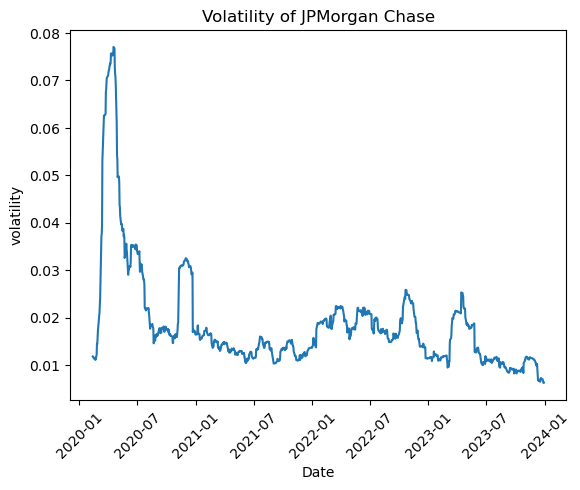

In [15]:
# draw a plot to visualize the volatility
plt.plot(volatility_df.index,volatility_df['volatility'])
plt.title('Volatility of JPMorgan Chase')
plt.xlabel('Date')
plt.ylabel('volatility')
plt.xticks(rotation=45) 
plt.show()

There is an apparent peak in the first half of 2020, which indicates the highest volatility during the period in chart. The big volatile may be caused by many possible reasons, such as big news and economic events.
After the initial peak, volatility appears to show a relatively flat trend which suggests that the market has gradually digests influence of the big information.
Combined with the previously line graph of JPMorgan Chase's stock price over time, we can know that there is a huge drop of stock price in the first half of 2020. I guess it maybe caused by the impact of the COVID-19 pandemic, which leads to an economic recession worldwide.

3. How does the change in trading volume of JPMorgan Chase's stock affect its stock price?

In [16]:
# have a basic statistics of data sets
SDPA_df[['JPM_Close','JPM_Volume']].describe()

,JPM_Close,JPM_Volume
count,1008.000000,1.008000e+03
mean,133.546319,1.413790e+07
std,22.355110,7.333324e+06
min,79.029999,3.220500e+06
25%,116.387499,9.341925e+06
50%,137.430000,1.224810e+07
75%,152.147499,1.615750e+07
max,171.779999,5.441880e+07


In [17]:
# calculate the correlation
SDPA_df[['JPM_Close','JPM_Volume']].corr()

,JPM_Close,JPM_Volume
JPM_Close,1.000000,-0.445601
JPM_Volume,-0.445601,1.000000


The correlation between JPM stock close price and volume is '-0.445601' which means the moderate negative correlation. In other words, when JPMorgan Chase's trading volume increases, its stock close price tends to decrease and vice versa. 

According to the information, the reason may be that the increase in trading volume due to the big amount of selling trading. For example, when investors find some negative signals, they will expect that the price have a fall trend and tend to sell a large number of stock, so the close price of JPMorgan Chase's stock price will fall down.However, we can not determine whether there is a causal relationship between the stock price and trading volume, which means we need to run the Granger causality test to explore.

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests

granger_test=grangercausalitytests(SDPA_df[['JPM_Close','JPM_Volume']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1357  , p=0.1442  , df_denom=1004, df_num=1
ssr based chi2 test:   chi2=2.1421  , p=0.1433  , df=1
likelihood ratio test: chi2=2.1398  , p=0.1435  , df=1
parameter F test:         F=2.1357  , p=0.1442  , df_denom=1004, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8721  , p=0.0211  , df_denom=1001, df_num=2
ssr based chi2 test:   chi2=7.7829  , p=0.0204  , df=2
likelihood ratio test: chi2=7.7529  , p=0.0207  , df=2
parameter F test:         F=3.8721  , p=0.0211  , df_denom=1001, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2223  , p=0.0220  , df_denom=998, df_num=3
ssr based chi2 test:   chi2=9.7346  , p=0.0210  , df=3
likelihood ratio test: chi2=9.6878  , p=0.0214  , df=3
parameter F test:         F=3.2223  , p=0.0220  , df_denom=998, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5346  , p=0.03

The results show Granger causality tests in different lags.
When lag=1, all the p values are above 0.05, so there is no sufficient evidence to claim that 'JPM_Volume' is a Granger cause of 'JPM_Close'.
When lag=2, lag=3 and lag=4, all the p values are below 0.05 which means we can predict that the trading volume of JPMorgan Chase's stock is a Granger cause of JPMorgan Chase's stock close price.